In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../../Divar.csv")

C:\Users\Rumi\AppData\Local\Temp\ipykernel_18656\4199417033.py:6: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../Divar.csv")


<div <div dir="rtl" align="right">

 #### 1. توزیع آگهی‌های موجود در دسته‌های مختلف را برای دسته‌بندی سطح دو و سطح سه رسم کنید.
</div>

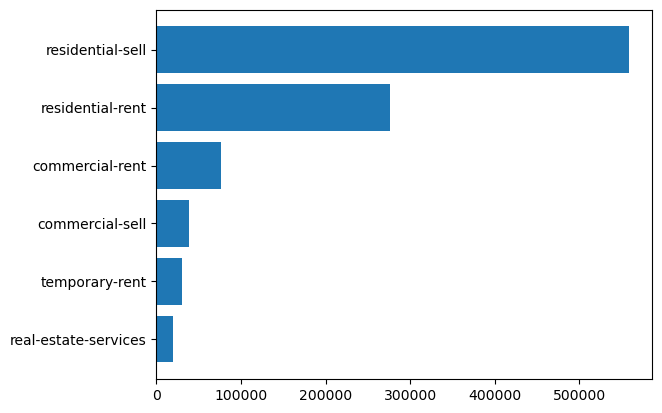

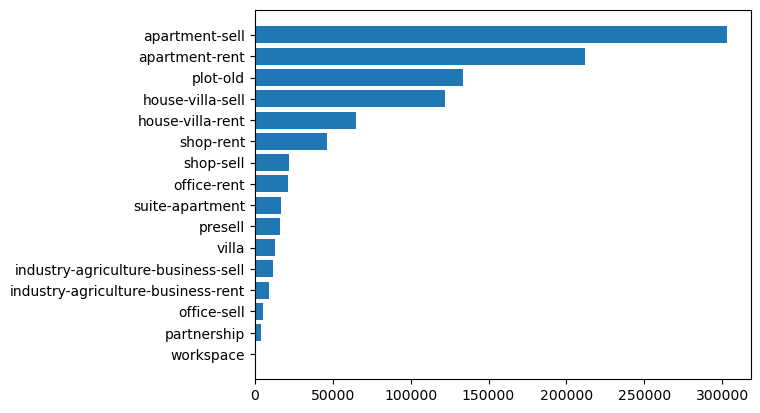

In [3]:
cat2_counts = df['cat2_slug'].value_counts(ascending = True)

plt.barh(cat2_counts.index , cat2_counts.values)
plt.show()

cat3_counts = df['cat3_slug'].value_counts(ascending = True)
plt.barh(cat3_counts.index , cat3_counts.values)
plt.show()

<div <div dir="rtl" align="right">

### تحلیل توزیع دسته‌بندی‌ها

* بازار املاک عمدتاً توسط **ملک‌های مسکونی** شکل گرفته است و بیشترین تعداد آگهی‌ها مربوط به آپارتمان‌ها می‌باشد.
* **فعالیت فروش بیش از اجاره** در هر دو دسته آپارتمان‌ها و خانه‌ها/ویلاها است.
* **آگهی‌های فروش ملک‌های تجاری کمتر از اجاره‌های آن‌ها** است؛ به‌طور مثال، تعداد آگهی‌های فروش دفتر کاری تقریبا یک‌چهارم آگهی‌های اجاره آن می‌باشد.
* **زمین/قطعه و فضاهای تجاری** بخش کوچکتر ولی قابل توجهی از آگهی‌ها را تشکیل می‌دهند.
* **دسته‌های کم‌تعداد و پراکنده** وجود دارد (مثل workspace و partnership) که ممکن است در مدلسازی نیاز به تجمیع داشته باشند.


    * “آپارتما‌ن‌ها حدود ~۶۱٪ از کل آگهی‌های مسکونی را تشکیل می‌دهند.”
    * “اجاره‌های موقت تنها ~۳٪ از کل بازار را شامل می‌شوند.”

</div>

<div dir="rtl" align="right">

#### 4.توزیع قیمت فروش‌(price_value) را برای دسته‌بندی‌های سطح سه در یک نمودار رسم کنید.

</div>

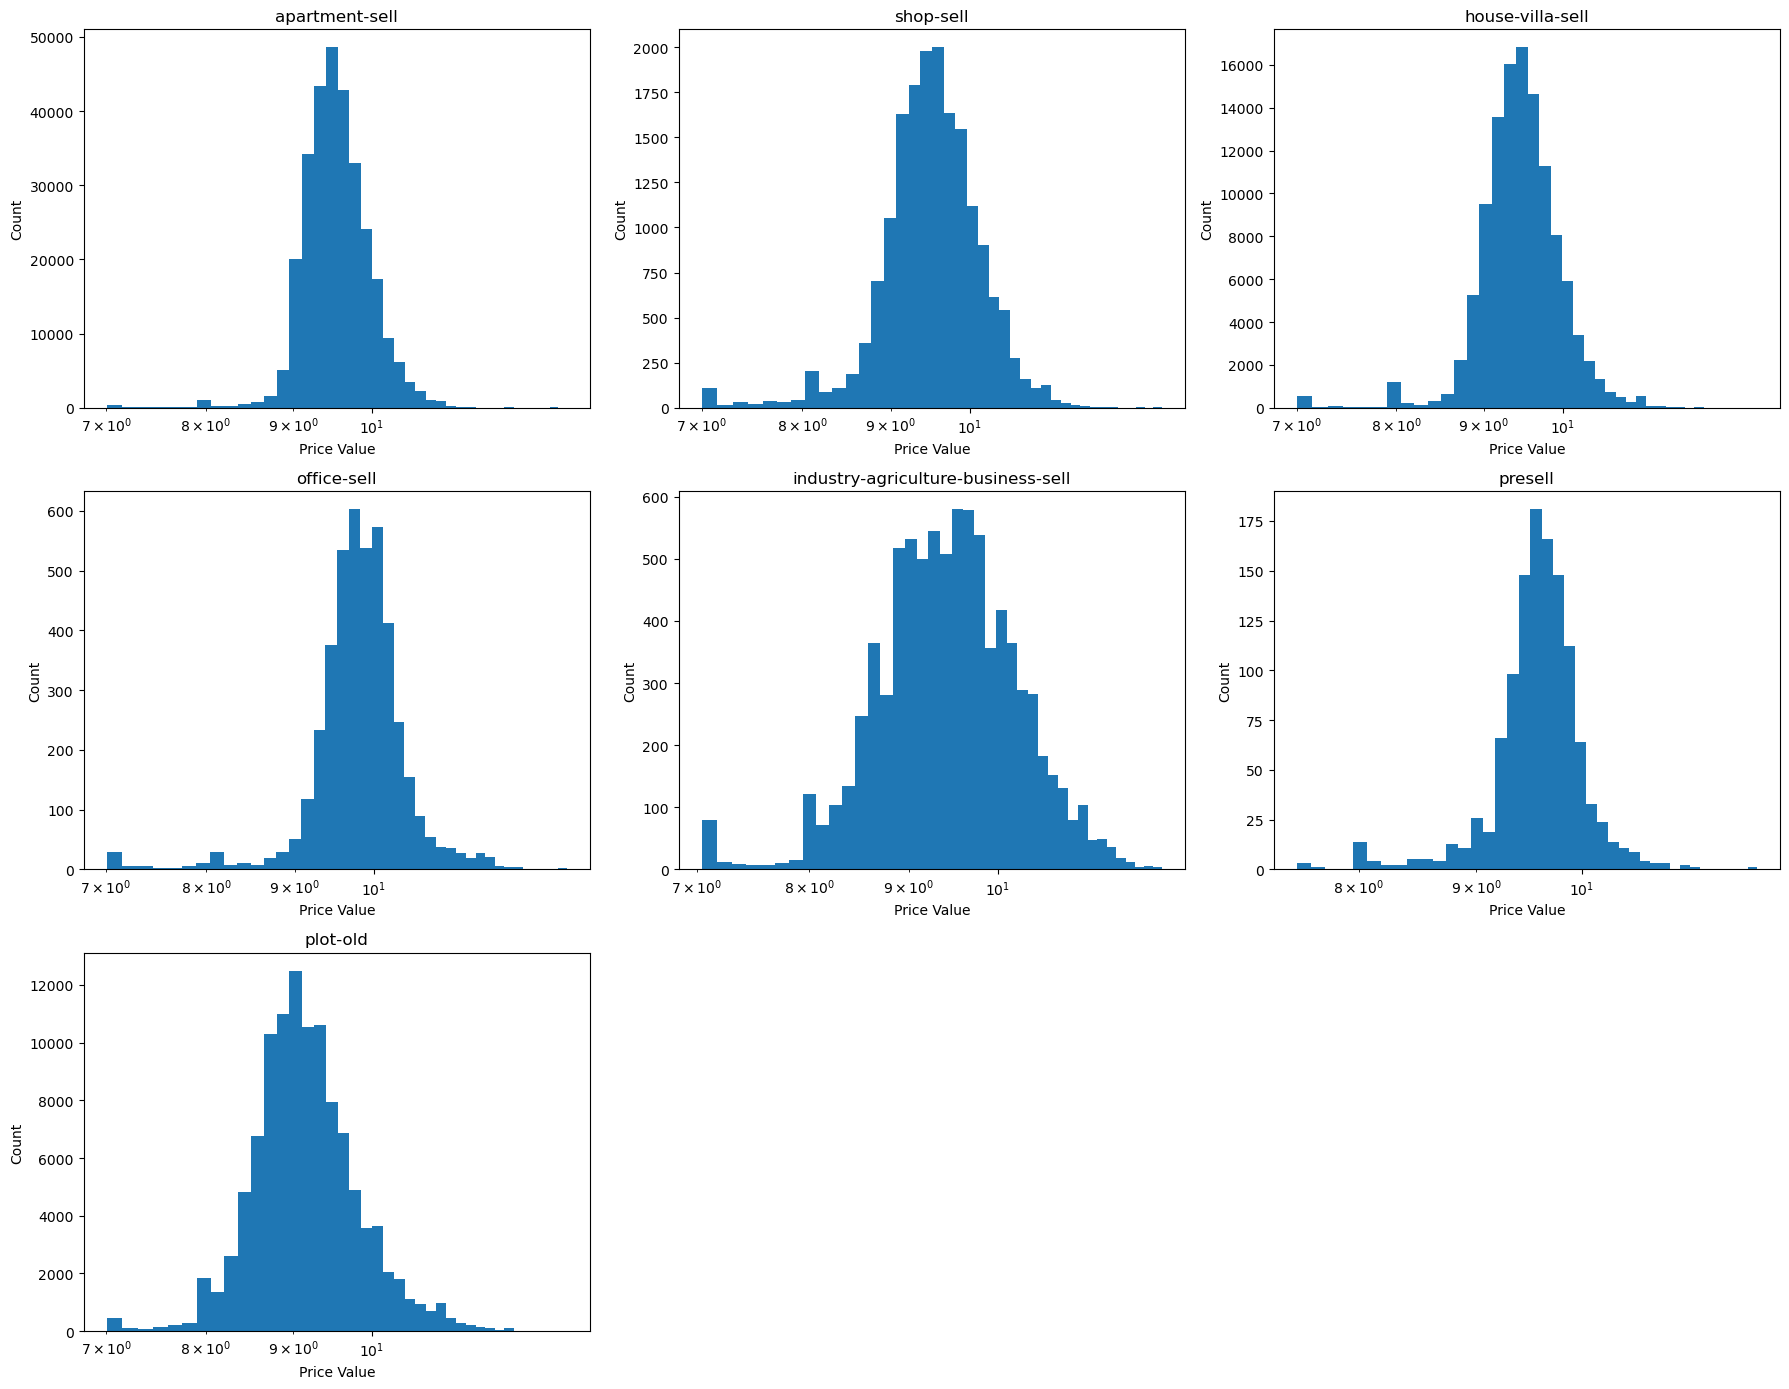

In [4]:
cat3_columns = list(df["cat3_slug"].dropna().unique())
cat3_list = []

for col in cat3_columns:
    if "sell" in col:
        cat3_list.append(col)

cat3_list.append("plot-old")

df_hist = df[df["price_value"].notna()]

df_test = df_hist[df_hist["price_value"] > 10000000] #Zir 1 million toman melk be forush nemiresad
df_test = df_test[df_test["price_value"] < 1e+13] # Va balae 1 trilion ham nist

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
axes = axes.flatten()


for i, cat in enumerate(cat3_list):
    data = df_test[df_test["cat3_slug"] == cat]["price_value"]
    
    axes[i].hist(np.log10(data), bins=40)
    axes[i].set_xscale('log')
    axes[i].set_title(cat)
    axes[i].set_xlabel("Price Value")
    axes[i].set_ylabel("Count")
    axes[i].set_xlim(None)


for j in range(len(cat3_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


بازار آگهی‌های فروش ملک در ایران عمدتاً در بازه‌ی ۱ تا ۱۰ میلیارد تومان متمرکز است، اما در برخی دسته‌ها (به‌ویژه املاک تجاری و صنعتی) تعداد کمی آگهی با قیمت‌های بسیار بالا وجود دارد که باعث چولگی شدید توزیع می‌شود. استفاده از مقیاس لگاریتمی برای تحلیل این داده‌ها کاملاً ضروری و مناسب است.

به دلیل چولگی شدید داده‌های قیمتی، تعداد زیادی نقاط پرت در نمودار مشاهده می‌شود.

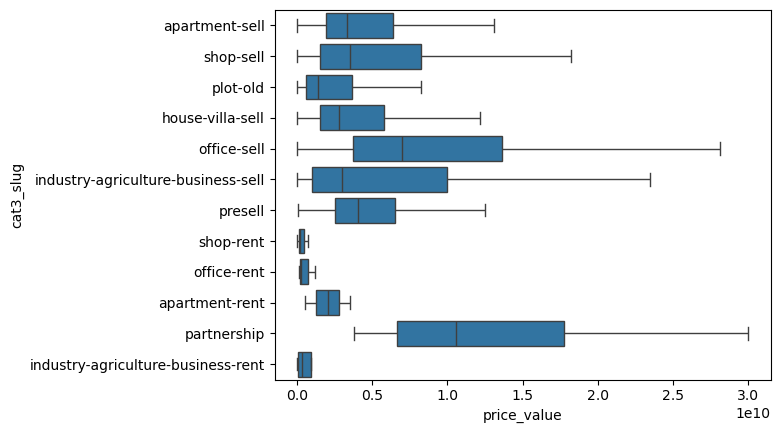

In [5]:
sns.boxplot(df_test, x="price_value", y ="cat3_slug", showfliers=False)
plt.show()

با حذف این نقاط پرت به این شکل که مطلوب تر است میرسیم که به شکل بهتری به ما توزیع را نشان میدهد اما خیلی از املاک لوکس در نظر گرفته نشده


<div dir="rtl" align="right">

#### 5.بر روی نقشه‌ی جغرافیایی heatmap آگهی‌های هر منطقه را رسم کنید. تراکم آگهی‌ها کدام منطقه بیشتر است؟
</div>

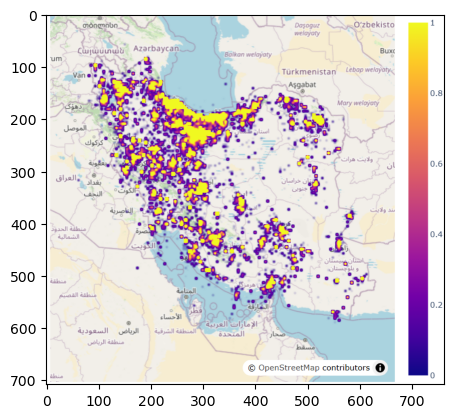

In [16]:
# import plotly.express as px
# fig = px.density_map(df, lat='location_latitude', lon='location_longitude', radius=1,
#                         center=dict(lat=32, lon=53), zoom=4, height=700, width= 700,
#                         map_style="open-street-map")
# fig.show()
from PIL import Image
img = np.asarray(Image.open('fig/image.png'))
imgplot = plt.imshow(img)
#The density map was too heavy, so it has been replaced with an image for your convenience. Please run the code above if needed.

<div <div dir="rtl" align="right">


### تحلیل نقشهٔ حرارتی آگهی‌ها

* بیشترین تراکم آگهی‌ها در **شمال ایران** مشاهده می‌شود، به‌ویژه مناطق تهران، البرز، گیلان و رشت.
* همچنین **کلان‌شهرها** دیگر نیز تراکم قابل توجهی دارند، اما کمتر از مناطق شمالی هستند.
* مناطق **جنوب و شرق ایران** دارای تراکم کمتری از آگهی‌ها هستند که نشان‌دهنده‌ی بازار کوچک‌تر یا تعداد کمتر آگهی‌ها در این مناطق است.
* تعداد بسیار کمی از آگهی‌ها در **کشورهای همسایه** مانند عراق، عربستان سعودی، سوریه و حتی ترکیه ثبت شده‌اند. این آگهی‌ها خیلی کم هستند و می‌توان آن‌ها را برای تحلیل بازار داخلی ایران نادیده گرفت.
* این تحلیل نشان می‌دهد که بازار املاک ایران عمدتاً حول **مناطق شهری و شمالی کشور** متمرکز است و برای هرگونه تحلیل یا مدلسازی تراکم، تمرکز بر این مناطق منطقی است.

</div>


7. در طول زمان قیمت‌های اسمی افزایش پیدا می‌کنند اما این افزایش لزوما به معنی بالارفتن ارزش واقعی ملک نیست و می‌تواند ناشی از تورم باشد. به ازای میانگین مبلغ قیمت در سال‌های ۱۴۰۰ تا ۱۴۰۳ قیمت حقیقی را محاسبه کنید و بررسی کنید ترند قیمت حقیقی چگونه است. 


In [2]:

import pandas as pd


df_divar = pd.read_csv("C:/Users/Memari/Downloads/Divar.csv")

C:\Users\Memari\AppData\Local\Temp\ipykernel_2220\1253547538.py:4: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_divar = pd.read_csv("C:/Users/Memari/Downloads/Divar.csv")


In [3]:
# تبدیل created_at_month به datetime
df_divar['created_at_month'] = pd.to_datetime(
    df_divar['created_at_month'],
    errors='coerce'
)

print(df_divar['created_at_month'].head(5))
print(df_divar['created_at_month'].dtype)

0   2024-08-01
1   2024-05-01
2   2024-10-01
3   2024-06-01
4   2024-05-01
Name: created_at_month, dtype: datetime64[ns]
datetime64[ns]


In [4]:
#  تبدیل به سال شمسی
!pip install jdatetime

import jdatetime

def to_shamsi_year(date):
    if pd.isna(date):
        return None
    return jdatetime.date.fromgregorian(date=date).year

df_divar['year_shamsi'] = df_divar['created_at_month'].apply(to_shamsi_year)

# چک کردن نتیجه
print(df_divar[['created_at_month', 'year_shamsi']].head(10))
print("\nCounts per year_shamsi:")
print(df_divar['year_shamsi'].value_counts().sort_index())

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 2/2 [jdatetime]

  created_at_month  year_shamsi
0       2024-08-01         1403
1       2024-05-01         1403
2       2024-10-01         1403
3       2024-06-01         1403
4       2024-05-01         1403
5       2024-09-01         1403
6       2024-11-01         1403
7       2024-09-01         1403
8       2024-06-01         1403
9       2024-10-01         1403

Counts per year_shamsi:
year_shamsi
1398         1
1399         2
1400         9
1401       120
1402      5664
1403    994204
Name: count, dtype: int64


## #پیش_پردازش #price_value #پاکسازی_داده

In [5]:
df_divar.dropna(subset=['price_value'], inplace=True)

print("Shape of DataFrame after dropping rows with NaN in 'price_value':")
print(df_divar.shape)
print("Number of NaN values in 'price_value' after dropping:")
print(df_divar['price_value'].isnull().sum())

Shape of DataFrame after dropping rows with NaN in 'price_value':
(568346, 62)
Number of NaN values in 'price_value' after dropping:
0


## #فیلتر_سال #داده‌های_سالانه #سال_شمسی

In [6]:
target_shamsi_years = [1400, 1401, 1402, 1403]
df_divar_filtered = df_divar[df_divar['year_shamsi'].isin(target_shamsi_years)]

print("Shape of df_divar_filtered after filtering by Shamsi years:")
print(df_divar_filtered.shape)
print("\nUnique Shamsi years in filtered DataFrame:")
print(df_divar_filtered['year_shamsi'].unique())

Shape of df_divar_filtered after filtering by Shamsi years:
(568345, 62)

Unique Shamsi years in filtered DataFrame:
[1403 1402 1401 1400]


## #تورم_تجمعی #سال_پایه #ضریب_تنظیم_تورم

In [7]:
inflation_rates = {
    1400: 40.2, # تورم 1400
    1401: 45.7, # تورم 1401
    1402: 40.7,  # تورم 1402
    1403: 32.5  # تورم 1403
}

base_year = 1400
cumulative_inflation_factors = {}

cumulative_inflation_factors[base_year] = 1.0

for year in range(base_year + 1, 1404):
    previous_year = year - 1
    annual_inflation_rate = inflation_rates[previous_year]
    cumulative_inflation_factors[year] = cumulative_inflation_factors[previous_year] * (1 + annual_inflation_rate / 100)

print("Cumulative Inflation Factors (relative to base year 1400):")
print(cumulative_inflation_factors)

Cumulative Inflation Factors (relative to base year 1400):
{1400: 1.0, 1401: 1.4020000000000001, 1402: 2.042714, 1403: 2.8740985980000002}


In [8]:
nominal_prices_raw = df_divar_filtered.groupby('year_shamsi')['price_value'].mean()

print("Mean nominal 'price_value' per Shamsi year:")
print(nominal_prices_raw)

Mean nominal 'price_value' per Shamsi year:
year_shamsi
1400    1.066667e+09
1401    1.882049e+10
1402    7.918916e+09
1403    1.743388e+10
Name: price_value, dtype: float64


In [9]:
inflation_factors_series = pd.Series(cumulative_inflation_factors)

real_prices_raw = nominal_prices_raw / inflation_factors_series

print("Mean real 'price_value' per Shamsi year (adjusted for inflation):")
print(real_prices_raw)

Mean real 'price_value' per Shamsi year (adjusted for inflation):
year_shamsi
1400    1.066667e+09
1401    1.342403e+10
1402    3.876664e+09
1403    6.065860e+09
dtype: float64


In [10]:
print("Annual Inflation Rates (Shamsi Years):")
print(inflation_rates)


Annual Inflation Rates (Shamsi Years):
{1400: 40.2, 1401: 45.7, 1402: 40.7, 1403: 32.5}


In [11]:
print("\nMean Nominal 'price_value' per Shamsi year:")
print(nominal_prices_raw)


Mean Nominal 'price_value' per Shamsi year:
year_shamsi
1400    1.066667e+09
1401    1.882049e+10
1402    7.918916e+09
1403    1.743388e+10
Name: price_value, dtype: float64


In [12]:
print("Mean Real 'price_value' per Shamsi year (adjusted for inflation):")
print(real_prices_raw)

Mean Real 'price_value' per Shamsi year (adjusted for inflation):
year_shamsi
1400    1.066667e+09
1401    1.342403e+10
1402    3.876664e+09
1403    6.065860e+09
dtype: float64


In [15]:
import matplotlib.pyplot as plt

comparison_df = pd.DataFrame({
    'Nominal Price': nominal_prices_raw,
    'Real Price': real_prices_raw
})

print("Comparison DataFrame:")
print(comparison_df)

Comparison DataFrame:
             Nominal Price    Real Price
year_shamsi                             
1400          1.066667e+09  1.066667e+09
1401          1.882049e+10  1.342403e+10
1402          7.918916e+09  3.876664e+09
1403          1.743388e+10  6.065860e+09


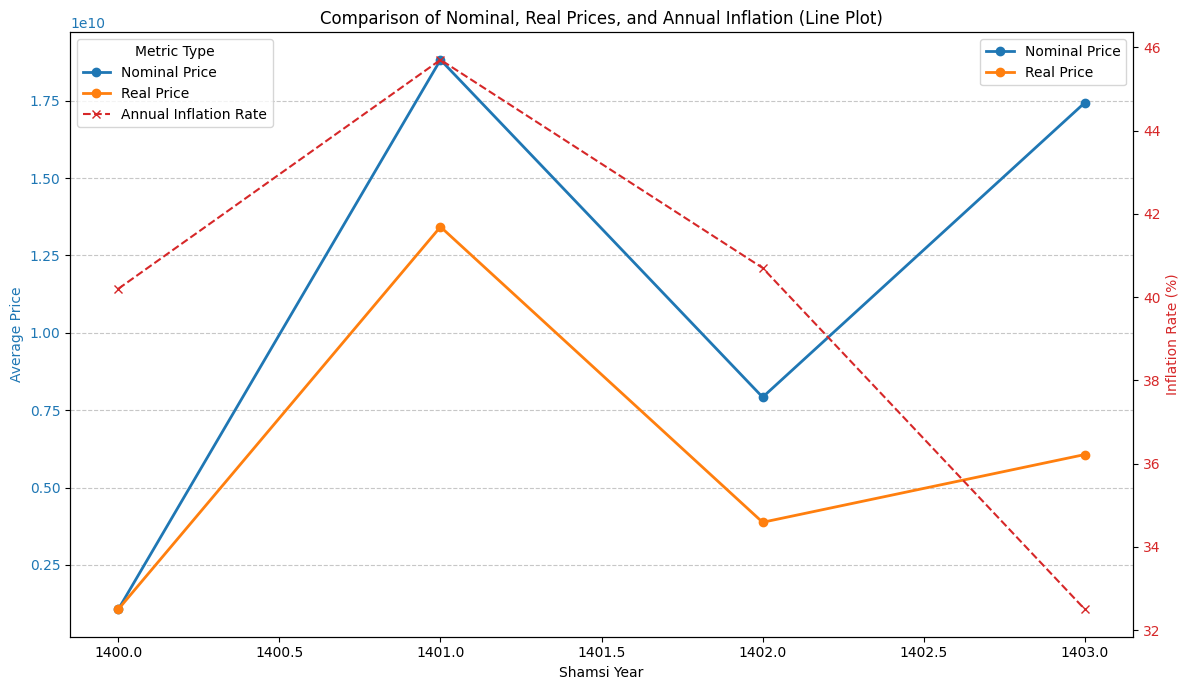

In [17]:
inflation_rates_series = pd.Series(inflation_rates, name='Annual Inflation Rate')

fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Nominal and Real Prices on primary y-axis
comparison_df.plot(kind='line', ax=ax1, marker='o', linewidth=2)
ax1.set_xlabel('Shamsi Year')
ax1.set_ylabel('Average Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for inflation rates
ax2 = ax1.twinx()
inflation_rates_series.loc[comparison_df.index].plot(kind='line', ax=ax2, marker='x', color='tab:red', linestyle='--', label='Annual Inflation Rate')
ax2.set_ylabel('Inflation Rate (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', title='Metric Type')

plt.title('Comparison of Nominal, Real Prices, and Annual Inflation (Line Plot)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## #فیلترینگ_IQR #حذف_ناهنجاری_آماری

In [18]:
nominal_prices_iqr_filtered = {}

for year in target_shamsi_years:
    df_year = df_divar_filtered[df_divar_filtered['year_shamsi'] == year]
    price_values = df_year['price_value']

    Q1 = price_values.quantile(0.25)
    Q3 = price_values.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_prices = price_values[(price_values >= lower_bound) & (price_values <= upper_bound)]

    nominal_prices_iqr_filtered[year] = filtered_prices.mean()

nominal_prices_iqr_filtered_series = pd.Series(nominal_prices_iqr_filtered)

print("Mean nominal 'price_value' per Shamsi year after IQR outlier removal:")
print(nominal_prices_iqr_filtered_series)

Mean nominal 'price_value' per Shamsi year after IQR outlier removal:
1400    1.066667e+09
1401    2.482368e+09
1402    3.365993e+09
1403    3.332675e+09
dtype: float64


In [19]:
inflation_factors_iqr_series = pd.Series(cumulative_inflation_factors)
real_prices_iqr_filtered = nominal_prices_iqr_filtered_series / inflation_factors_iqr_series

print("Mean real 'price_value' per Shamsi year after IQR outlier removal (adjusted for inflation):")
print(real_prices_iqr_filtered)

Mean real 'price_value' per Shamsi year after IQR outlier removal (adjusted for inflation):
1400    1.066667e+09
1401    1.770591e+09
1402    1.647804e+09
1403    1.159555e+09
dtype: float64


In [20]:
comparison_df_iqr_filtered = pd.DataFrame({
    'Nominal Price (IQR Filtered)': nominal_prices_iqr_filtered_series,
    'Real Price (IQR Filtered)': real_prices_iqr_filtered
})

print("Comparison DataFrame after IQR filtering:")
print(comparison_df_iqr_filtered)

Comparison DataFrame after IQR filtering:
      Nominal Price (IQR Filtered)  Real Price (IQR Filtered)
1400                  1.066667e+09               1.066667e+09
1401                  2.482368e+09               1.770591e+09
1402                  3.365993e+09               1.647804e+09
1403                  3.332675e+09               1.159555e+09


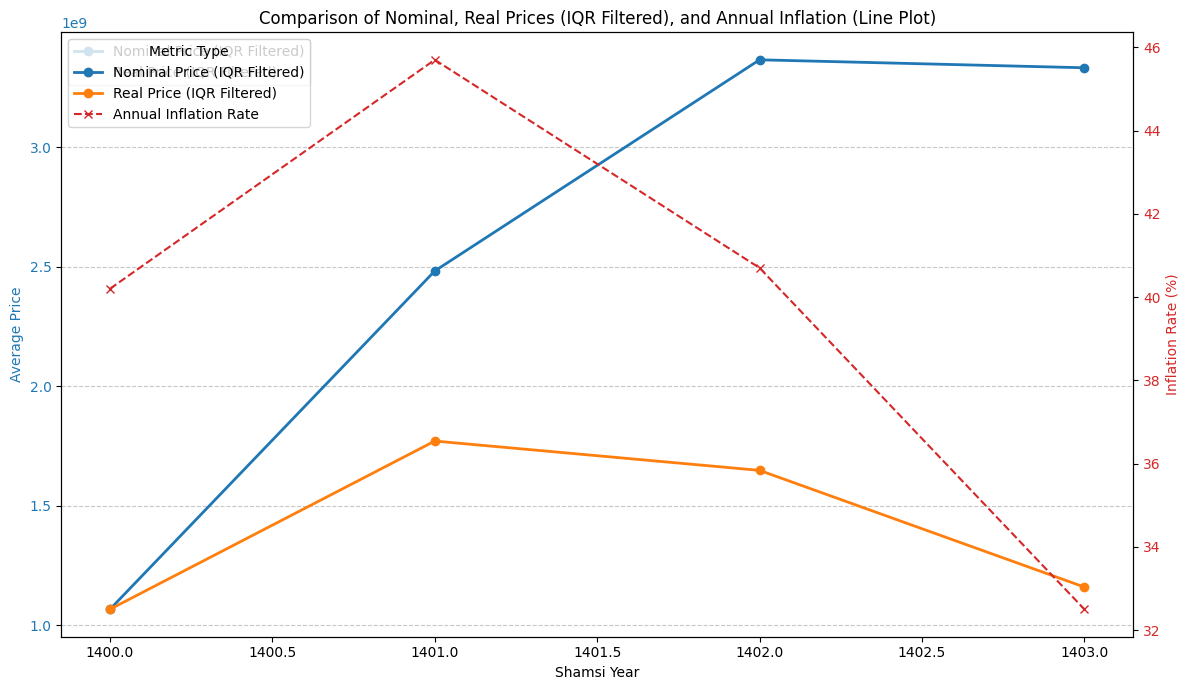

In [21]:
inflation_rates_series = pd.Series(inflation_rates, name='Annual Inflation Rate')

fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Nominal and Real Prices (IQR Filtered) on primary y-axis
comparison_df_iqr_filtered.plot(kind='line', ax=ax1, marker='o', linewidth=2)
ax1.set_xlabel('Shamsi Year')
ax1.set_ylabel('Average Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for inflation rates
ax2 = ax1.twinx()
inflation_rates_series.loc[comparison_df_iqr_filtered.index].plot(kind='line', ax=ax2, marker='x', color='tab:red', linestyle='--', label='Annual Inflation Rate')
ax2.set_ylabel('Inflation Rate (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', title='Metric Type')

plt.title('Comparison of Nominal, Real Prices (IQR Filtered), and Annual Inflation (Line Plot)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

9.می‌خواهیم بررسی کنیم خانه‌هایی که دارای بالکن، آسانسور، نگهبان، باربیکیو و استخر هستند عمدتا در کدام مناطق قرار دارند. با نمودار مناسب این موضوع را نشان دهید.